In [ ]:
from functools import reduce
import pandas as pd

df = pd.read_table('ekspresije.tsv',  index_col=0)
data = [(cell, gene, value) for cell in df.columns
                            for gene, value in df[cell].iteritems()]

## Zadatak 1

1.1

In [ ]:
def mean_val(array, val):
  array[1][3] += 1
  if val[0] == array[1][0]:
    array[1][1] += 1
    array[1][2] += val[2]
  else:
    # sum/cnt
    array[0].append((array[1][0],array[1][2]/array[1][1]))
    array[1][2] = val[2]
    array[1][1] = 1
    array[1][0] = val[0]

  if array[1][3] == array[1][4]:
    array[0].append((array[1][0],array[1][2]/array[1][1]))

  return array

prev_cell = data[0][0]
cnt = 0
summ = 0
iter = 0
mean_vals = reduce(mean_val, data, [[],[prev_cell, cnt, summ, iter, len(data)-1]])[0]

1.2

In [ ]:
mean_vals

In [ ]:
def convert_to_dict(array, val):
  array[val[0]] = val[1]
  return array

mean_vals_dict = reduce(convert_to_dict, mean_vals, {})

In [ ]:
def center(val):
  return val[0], val[1], val[2] - mean_vals_dict[val[0]]

centered = list(map(center, data))
centered

1.3

In [ ]:
def data_var(array, val):
  array[1][3] += 1
  if val[0] == array[1][0]:
    array[1][1] += 1
    array[1][2] += val[2]**2
  else:
    # sum/cnt
    array[0].append((array[1][0],array[1][2]/array[1][1]))
    array[1][2] = val[2]**2
    array[1][1] = 1
    array[1][0] = val[0]

  if array[1][3] == array[1][4]:
    array[0].append((array[1][0],array[1][2]/array[1][1]))

  return array


prev_cell = centered[0][0]
cnt = 0
summ = 0
iter = 0
variance = reduce(data_var, centered, [[], [prev_cell, cnt, summ, iter, len(data)-1]])[0]


In [ ]:
variance

1.4

In [ ]:
from math import sqrt

def _std_dev(val):
  return val[0], val[1], sqrt(val[1])

std_dev = list(map(_std_dev, variance))

In [ ]:
std_dev

1.5

In [ ]:
std_dev_dict = reduce(convert_to_dict, std_dev,{})

In [ ]:
def standard_scaler(val):
  cntrd = val
  return cntrd[0], cntrd[1], cntrd[2]/std_dev_dict[cntrd[0]]

ss = list(map(standard_scaler, centered))
ss

## Zadatak 2

2.1

In [ ]:
ss_sorted = sorted(ss, key=lambda x: x[1])

In [ ]:
def mean_val_gene(array, val):
  array[1][3] += 1
  if val[1] == array[1][0]:
    array[1][1] += 1
    array[1][2] += val[2]
  else:
    # sum/cnt
    array[0].append((array[1][0],array[1][2]/array[1][1]))
    array[1][2] = val[2]
    array[1][1] = 1
    array[1][0] = val[1]

  if array[1][3] == array[1][4]:
    array[0].append((array[1][0],array[1][2]/array[1][1]))

  return array

prev_gene = ss_sorted[0][1]
cnt = 0
summ = 0
iter = 0
mean_vals_gene = reduce(mean_val_gene, ss_sorted, [[], [prev_gene, cnt, summ, iter, len(ss_sorted)-1]])[0]

In [ ]:
mean_vals_gene_dict = reduce(convert_to_dict, mean_vals_gene, {})

def center_gene(val):
  return val[0], val[1], val[2] - mean_vals_gene_dict[val[1]]



centered_gene = list(map(center_gene, ss_sorted))

In [ ]:
def data_var_gene(array, val):
  array[1][3] += 1
  if val[1] == array[1][0]:
    array[1][1] += 1
    array[1][2] += val[2]**2
  else:
    # sum/cnt
    array[0].append((array[1][0],array[1][2]/array[1][1]))
    array[1][2] = val[2]**2
    array[1][1] = 1
    array[1][0] = val[1]

  if array[1][3] == array[1][4]:
    array[0].append((array[1][0],array[1][2]/array[1][1]))

  return array


prev_gene = centered_gene[0][1]
cnt = 0
summ = 0
iter = 0
variance_gene = reduce(data_var_gene, centered_gene, [[], [prev_gene, cnt, summ, iter, len(ss_sorted)-1]])[0]

In [ ]:
len(variance_gene)

5068

2.2

In [ ]:
variance_gene_sorted = sorted(variance_gene, key=lambda x: -x[1])

def top_500(array, val):
  array[1] += 1
  if array[1] <= 500:
    array[0].append(val)
  return array

top_var = reduce(top_500, variance_gene_sorted, [[],0])[0]

2.3

In [ ]:
def convert_to_dict(array, val):
  array[val[0]] = 1
  return array

top_var_dict = reduce(convert_to_dict, top_var, {})

In [ ]:
def filtering(array, val):
  if val[1] in top_var_dict.keys() and val[2]:
      array.append(val)
  return array

filtered = reduce(filtering, ss, [])

2.4

In [ ]:
filtered_sorted = sorted(filtered, key = lambda x: (x[1], x[2]))

2.5

In [ ]:
def _rank_norm(array, val):
  if array[1][0] != val[1]:
    array[1][2] = 1
    array[1][0] = val[1]
    array[1][1] = val[2]
  else:
    if array[1][1] < val[2]:
      array[1][2] += 1
      array[1][1] = val[2]
  array[0].append((val[0], val[1], val[2], array[1][2]))
  return array

rank = 1
prev_gene = filtered_sorted[0][1]
prev_val = filtered_sorted[0][2]

rank_norm = reduce(_rank_norm, filtered_sorted, [[],[prev_gene, prev_val, rank]])[0]

2.6

In [ ]:
def rem(val):
  return val[0]

top_var_only = list(map(rem, top_var))
top_var_only

## Zadatak 3

3.1

In [ ]:
print(rank_norm[:100])

[('cell_41', 'ABI3', -0.1226363820906653, 1), ('cell_435', 'ABI3', -0.11757919806620276, 2), ('cell_128', 'ABI3', -0.09932321860244774, 3), ('cell_299', 'ABI3', -0.0957385594136825, 4), ('cell_445', 'ABI3', -0.09502720874933167, 5), ('cell_182', 'ABI3', -0.09362122669831953, 6), ('cell_351', 'ABI3', -0.0891840126298507, 7), ('cell_178', 'ABI3', -0.08870071305698553, 8), ('cell_124', 'ABI3', -0.08699088259456551, 9), ('cell_430', 'ABI3', -0.08613074932029732, 10), ('cell_309', 'ABI3', -0.08485396725498215, 11), ('cell_454', 'ABI3', -0.08474512287800359, 12), ('cell_520', 'ABI3', -0.0824985580456294, 13), ('cell_485', 'ABI3', -0.08153410861227389, 14), ('cell_218', 'ABI3', -0.08144715879619316, 15), ('cell_428', 'ABI3', -0.08048456806435635, 16), ('cell_94', 'ABI3', -0.07862232934394722, 17), ('cell_254', 'ABI3', -0.07786525712921458, 18), ('cell_23', 'ABI3', -0.07783642442421548, 19), ('cell_164', 'ABI3', -0.07731731702078894, 20), ('cell_514', 'ABI3', -0.07670635464695873, 21), ('cell_

In [ ]:
sorted_cell_gene = sorted(filtered, key = lambda x: (x[0], x[1]))

In [ ]:
def group_by_cell(array, val):
  array[1][2] += 1
  if array[1][0] == val[0]:
    array[1][1].append(val[2])
  else:
    array[0].append((array[1][0], array[1][1]))
    array[1][1] = [val[2]]
    array[1][0] = val[0]

  if array[1][2] == array[1][3]:
    array[0].append((array[1][0], array[1][1]))

  return array

prev_cell = sorted_cell_gene[0][0]
curr_arr = []
iter = 0
grouped = reduce(group_by_cell, sorted_cell_gene, [[],[prev_cell, curr_arr, iter, len(sorted_cell_gene)-1]])[0]

In [ ]:
grouped

3.2

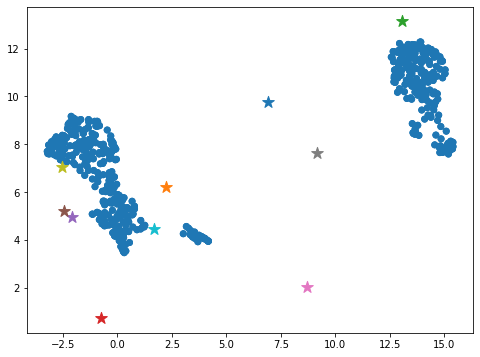

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np

embedding = pd.read_table('umap.tsv')
embedding['cluster'] = 0
plt.figure(figsize=(8, 6))
plt.scatter(
    embedding.umap1,
    embedding.umap2,
    c=[sn.color_palette()[x] for x in embedding.cluster])


k = 10
np.random.seed(3)
centroids = np.random.uniform(-3, 15, (k, 2))


# Da pogledamo rezultat
plt.scatter(embedding.umap1,embedding.umap2,c=[sn.color_palette()[x] for x in embedding.cluster])
for c in centroids:
  plt.scatter(*c, marker='*', s=150)

Prvi deo

In [ ]:
import sys
from functools import reduce
# print(embedding)
def finding_cluster(val):
  miny=sys.maxsize
  min_cluster=0
  # print(val)
  for j in range(len(centroids)):
    distance=np.sqrt(((centroids[j,0]-val[0])**2+(centroids[j,1]-val[1])**2))
    if miny>abs(distance):
      miny=distance
      min_cluster=j
  return min_cluster

matrix = []
for i in range(len(embedding)):
    matrix.append([embedding.umap1[i],embedding.umap2[i]])


cluster_assignments = list(map(finding_cluster, matrix))
print(cluster_assignments)

# Da pogledamo rezultat
for i, c in enumerate(centroids):
  plot = plt.scatter(*c, marker='*', s=150)
  cluster=[[embedding.umap1[j],embedding.umap2[j]] for j in range(len(embedding)) if cluster_assignments[j] == i]
  cluster = np.array(cluster)
  if len(cluster)!=0:
   plt.scatter(cluster[:, 0], cluster[:, 1], c=plot.get_facecolor())

Drugi deo

In [ ]:
def center_centroids(array,val):
  old_cluster=[[embedding.umap1[j],embedding.umap2[j]] for j in range(len(embedding)) if cluster_assignments[j] == array[1][0]]
  if len(old_cluster)!=0:
    first_position=sum(x[0] for x in old_cluster)/len(old_cluster)
    second_position=sum(x[1] for x in old_cluster)/len(old_cluster)
    array[0].append([first_position,second_position])
  else:
    array[0].append([val[0],val[1]])
  # print(val[1])
  array[1][0]+=1
  return array

iter=0
centroids = np.array(reduce(center_centroids, centroids, [[],[iter]])[0])


plt.scatter(embedding.umap1,embedding.umap2,c=[sn.color_palette()[x] for x in embedding.cluster])
for c in centroids:
  plt.scatter(*c, marker='*', s=150)

Drugi i treci deo iskombinovano

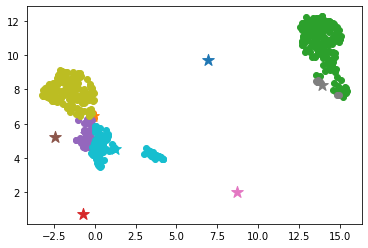

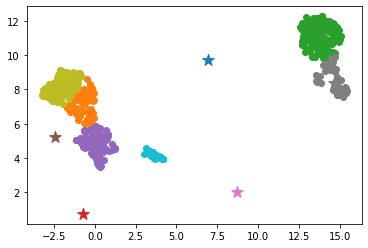

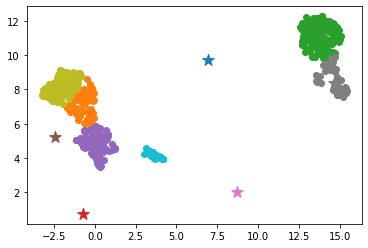

In [ ]:
for i in range(250):
  cluster_assignments = list(map(finding_cluster, matrix))
  centroids = np.array(reduce(center_centroids, centroids, [[],[iter]])[0])
  if i+1==1 or i+1==10 or i+1==250:
    for i, c in enumerate(centroids):
      plot = plt.scatter(*c, marker='*', s=150)
      cluster=[[embedding.umap1[j],embedding.umap2[j]] for j in range(len(embedding)) if cluster_assignments[j] == i]
      cluster = np.array(cluster)
      if len(cluster)!=0:
        plt.scatter(cluster[:, 0], cluster[:, 1], c=plot.get_facecolor())
    plt.show()
